In [279]:
from IPython.display import HTML, Javascript, display
import IPython
from ipywidgets import widgets
import random

# Create button that runs the below cell
def run_below(ev):
    display(Javascript('IPython.notebook.execute_cells([IPython.notebook.get_selected_index()+1])'))

run_code_below_button = widgets.Button(description="Run code")
run_code_below_button.on_click(run_below)

# Create toggle code button
def toggle_code(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide code'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        # toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

# Create the run code and toggle code buttons for the cell below
def create_buttons():
    display(run_code_below_button)
    display(toggle_code(for_next=True))
    
# Create a button that hides all the code in the notebook and autoruns on the notebook
hide_all_code_button = HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code for this notebook."></form>''')
display(hide_all_code_button)


# CODE BELOW WAS SUPPOSED TO BE A SMARTER TOGGLE BUTTON - DOESNT WORK YET
# javascript_functions = {False: "hide()", True: "show()"}
# button_descriptions  = {False: "Show code", True: "Hide code"}
# STATE = False
# def toggle_code(ev):
#     import random
#     for_next = True
#     this_cell = """$('div.cell.code_cell.rendered.selected')"""
#     next_cell = this_cell + '.next()'

#     toggle_text = 'Toggle show/hide'  # text shown on toggle link
#     target_cell = this_cell  # target cell to control with toggle
#     js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

#     if for_next:
#         target_cell = next_cell
#         toggle_text += ' next cell'
#         js_hide_current = this_cell + '.find("div.input").hide();'

#     js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

#     output = """
#         <script>
#             function {f_name}() {{
#                 {cell_selector}.find('div.input').toggle();
#             }}

#             {js_hide_current}
#         </script>

#         <a href="javascript:{f_name}()"></a>
#     """.format(
#         f_name=js_f_name,
#         cell_selector=target_cell,
#         js_hide_current=js_hide_current, 
#     )

#     display(HTML(output))


# def button_action(value):

#     """
#     Calls the toggle_code function and updates the button description.
#     """

#     state = value.new

#     toggle_code()
#     # Change the state
#     state = not state

#     value.owner.description = button_descriptions[state]
    
# def create_buttons():
#     state = False
#     #toggle_code(state)
#     code_toggle_button = widgets.ToggleButton(description = button_descriptions[state])
#     code_toggle_button.observe(button_action, "value")
#     display(widgets.HBox([run_code_below_button, code_toggle_button]))



# ALSO DOESNT WORK YET
# # Create toggle code button
# def toggle_code(for_next=True):
#     this_cell = """$('div.cell.code_cell.rendered.selected')"""
#     next_cell = this_cell + '.next()'

#     toggle_text = 'Toggle show/hide code'  # text shown on toggle link
#     target_cell = this_cell  # target cell to control with toggle
#     js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

#     if for_next:
#         target_cell = next_cell
#         # toggle_text += ' next cell'
#         js_hide_current = this_cell + '.find("div.input").hide();'

#     js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

#     html = """
#         <script>
#             function {f_name}() {{
#                 {cell_selector}.find('div.input').toggle();
#             }}

#             {js_hide_current}
#         </script>

#         <a href="javascript:{f_name}()">{toggle_text}</a>
#     """.format(
#         f_name=js_f_name,
#         cell_selector=target_cell,
#         js_hide_current=js_hide_current, 
#         toggle_text=toggle_text
#     )

#     return HTML(html)

# toggle_code_below_button = widgets.Button(description="Show/hide code")
# toggle_code_below_button.on_click(toggle_code)

# def create_buttons():
#     display(widgets.HBox([run_code_below_button, toggle_code_below_button]))

In [280]:
# Basic dependencies
import math

# Numerical and dataframe dependencies
import numpy as np
import pandas as pd

# Plotting dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
alt.renderers.enable('notebook')
from livelossplot import PlotLosses
from livelossplot.tf_keras import PlotLossesCallback

# Machine Learning libraries
import sklearn.metrics as metrics
import tensorflow as tf
tf.random.set_seed(42)
tf.get_logger().setLevel('INFO') # Ignore warning/depreciation messages in the logger

%matplotlib inline

In [353]:
# Set overall global variables
HEIGHT = 32
WIDTH = 32
NUM_CHANNELS = 3
IMG_SHAPE = (HEIGHT, WIDTH, NUM_CHANNELS)
CLASS_NAMES = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}
NUM_CLASSES = len(CLASS_NAMES) # 10

BATCH_SIZE = 32 #Default batch size, could be changed

DATA_LOADED = False # Add in more of these?!?!
DATA_PREPROCESSED = False
BASELINE_MODEL_BUILT = False
NN_CONFUSION_MATRIX = False

In [363]:
# Helper functions
def print_confusion_matrix(predicted_labels, true_labels, class_names, figsize = (20,10), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    confusion_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
    confusion_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    cm_sum = np.sum(df_cm, axis=1)
    cm_perc = df_cm / cm_sum.astype(float) * 100
    
    fig = plt.figure(figsize=figsize)
    annot = np.empty_like(df_cm).astype(str)
    nrows, ncols = df_cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = df_cm.iloc[i][j]
            p = cm_perc.iloc[i][j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    
    heatmap = sns.heatmap(df_cm, annot=annot, fmt='')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.tight_layout()
    
def checkpoint(checkpoint_number=None):
    assert isinstance(checkpoint_number, int), 'The checkpoint number must be an integer!'
    vars_to_check = [
        DATA_LOADED,
        DATA_PREPROCESSED,
        BASELINE_MODEL_BUILT,
        NN_CONFUSION_MATRIX
    ]
    error_messages = [
        "Please first load the data",
        "Please preprocess the data before you train the neural networks",
        "Please first build the baseline Neural Network model",
        "Please first run the confusion matrix"
    ]
    
    error_message_endstring = """ \n
    (This is probably just because you missed a button, so try clicking the button above and then clicking this
    one again. If that doesnt work, try pressing all of the above buttons in order and rerunning this cell again 
    by pressing the button)
    """
    
    for var_to_check, error_message in list(zip(vars_to_check, error_messages))[:checkpoint_number]:
        assert var_to_check, " ".join([error_message, error_message_endstring])

# 🤖 Intro to AI Notebook 🤖

<img src="images/IntroToAIOpeningImage.jpeg" width="600">

Welcome to the Jupyter notebook! This is the classic environment for a Data Scientist and Machine Learning Engineer. This is often where we experiment with pieces of code, look and analyse data and build machine learning models. It is also a useful tool for presenting the findings of our analyses in a clear manner.

We have set this notebook up in a special and unusual way today - all the code cells will be hidden, so you don't have to worry about it. But, if you would like to take a look then you can toggle the code on and off at any time!

You can also toggle on and off the code in the entire notebook with the button at the top.

The way we will interact with this notebook is as below:
- The "run code" cell will run the code in the hidden cell
- The toggle code button will allow you to see the underlying code, if you wish

You can try out these buttons below! The buttons below will print out the phrase ```Hello world``` - any good programmers first piece of code!



In [283]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

In [16]:
print('Hello world!')

Hello world!


## §0: Introduction
The intention of this notebook is to give you an interactive and friendly introduction to AI and Machine Learning by stepping through a classic data science/Machine Learning workflow.

<img src="images/DataScienceLifeCycle.jpg" width="800" title="Data Science Workflow">

A classic Machine Learning workflow is made up of the following general steps:

* Discovery phase
    * Identifying business challenges, bottlenecks and improvement/optimisation opportunities
    * Define Problem 
        * Specify Inputs & Outputs
    * Data Mapping
        * Understanding if the data required is already collected/attainable
        * Looking at leveraging similar online/open source datasets or purchasing datasets
        * **Are you collecting the right kinds of data?** - e.g if you wish to predict the outcome of a certain process you are monitoring, do you collect the outcome data you want to predict? If not, then an ML algorithm will not be able to learn. Can do rule based approaches, but not ML.
        * Data Quality
* Data Preparation Phase
    * Data Collection
    * Exploratory data analysis (EDA)
        * Loading the data
        * Data Quality
        * Data Understanding
        * Visualization 
    * Data Preprocessing / Cleaning
* Model Planning Phase
    * Model Design
    * Training
* Model Building Phase
    * Initial Offline Evaluation
* Communicate Results

* Operationalise
    * Model Deployment
    * Online Evaluation
    * Monitoring
    * Model Maintenance
    * Diagnosis
    * Retraining

<img src="images/MLWorkflow.png" width="800" title="ML Workflow">

<img src="images/MLWorkflowLowLevel.png" title="Low Level ML Workflow">

## §1: Discovery Phase
While this is an important element of any good Machine Learning project (see the "Data Science Process" talk), we defer the details for this workshop. In particular, suppose the outcomes of this were as follows:

### §1.1 Problem Definition
The problem definition that business X cares about is the classification of images. In particular, they want to develop a system that will take in RGB coloured images, and classify them into one of 10 pre-defined classes. These classes are:

* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

#### §1.1.1 Inputs
The input will be a 32x32 pixel RGB colour photograph of objects from these 10 classes

#### §1.1.2 Outputs
The output of the Machine Learning model will be a prediction of the class

### §1.2 Data Mapping
For the purposes of this exercise, we will defer data mapping. We can assume that the data has already been collected. However, it is worth stressing that this is a really important part of the process. The other talks such as **Data for AI** and **Data Science Process** go into this more, but it is importnat to think about whether or not the problem you have is suitable for machine learning before embarking on it to derisk it.

## §2: Data Preparation Phase
In this phase, we will prepare our inputs (defined above) ready for the models to be built. We will also perform some "Exploratory Data Analysis" (EDA) to look at our data and the type of data that we have.

### §2.1: Data Collection
Usually, we have to track down our data which might be sitting in many different internal systems. Typically, we would like to recieve a csv format (if the data is small enough) with corresponding "features" of the input and the "output variable" we are trying to track (if we have tabular data, which is the case for most predictions and time series models). You can think of this as a "barebones" excel spreadsheet - we would want the headers for the variable names across the top and the values in a table. We would also want to understand what each of the variables represent - so a brief description in a supporting document - as well as which are believed to be important for predicting the target variable. Additionally, it is also relevant to identify which variables to remove! For example, it would be unethical to predict someones loan amount based on their gender or age. See more in the "Ethics for AI" talk.

For our problem, we are working with Image data, so our dataset is a collection of images. For data collection here, we will actually just be using an open source (public) dataset that anyone can access, so we dont have any data collection issues. We will be working with the CIFAR dataset.

CIFAR is an acronym that stands for the [Canadian Institute For Advanced Research](https://www.cs.toronto.edu/~kriz/cifar.html) and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

* 0: airplane
* 1: automobile
* 2: bird
* 3: cat
* 4: deer
* 5: dog
* 6: frog
* 7: horse
* 8: ship
* 9: truck

These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

CIFAR-10 is a well-understood dataset and widely used for benchmarking computer vision algorithms in the field of machine learning. The problem is *“solved”*. It is relatively straightforward to achieve 80% classification accuracy. Top performance on the problem is achieved by deep learning convolutional neural networks with a classification accuracy of around 97% on the test dataset. Human accuracy is around 94%. 

Today, we will show you how you can build an image recognition classifier to be able to achieve human accuracy.

Click on the button below to download the dataset!

In [284]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

In [29]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Really we should also create a validation set - check if we want to do this or will it be too confusing?
# NUM_VAL_IMAGES = 10000
# from sklearn.model_selection import train_test_split 
# We will use this function to split our "training" set into our "training" + "validation" set - confusing name!
# (X_train, X_val), (y_train, y_val) = train_test_split(X_train, y_train, stratify=y_train, test_size=NUM_VAL_IMAGES)
# For now lets just set X_val, y_val to X_test, y_test
X_val, y_val = X_test, y_test

# Set global variables
N_TRAIN = len(X_train)
N_VAL = len(X_val)
N_TEST = len(X_test)

print('Dataset loaded!')
DATA_LOADED = True

Dataset loaded!


## §2.2: Exploratory Data Analysis (EDA)
In this section, we use graphical and numerical techniques to begin uncovering the structure of our data.

- Which variables suggest interesting relationships?
- Which observations are unusual?

- X.1 Data Collection
- X.2 Visualization
- X.3 Data Preprocessing
- X.4 Data Cleaning


### §2.2.1: Data Preprocessing
One key thing for computers is that we have to transform everything over to numbers - so when we are dealing with image data (or text data) we have to find a way of mapping each of the images into numbers that a computer can understand. Luckily, with RGB images we can do that. RGB Images are made up of pixels, and each pixel is a tuple $(R,G,B) = (x,y,z)$ where $x,y,z$ are all numbers between 0 and 255. That means we can instead represent each image as a *tensor of numbers*. We are going to define operations on them and build machine learning models so that the data can *flow* through these sets of processes (hence the name *Tensorflow* by Google, if you've heard of it!). The image below represents this process:

<img src="images/RGBImage.png" width="600" title="RGB Image converted into a tensor">

In [285]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

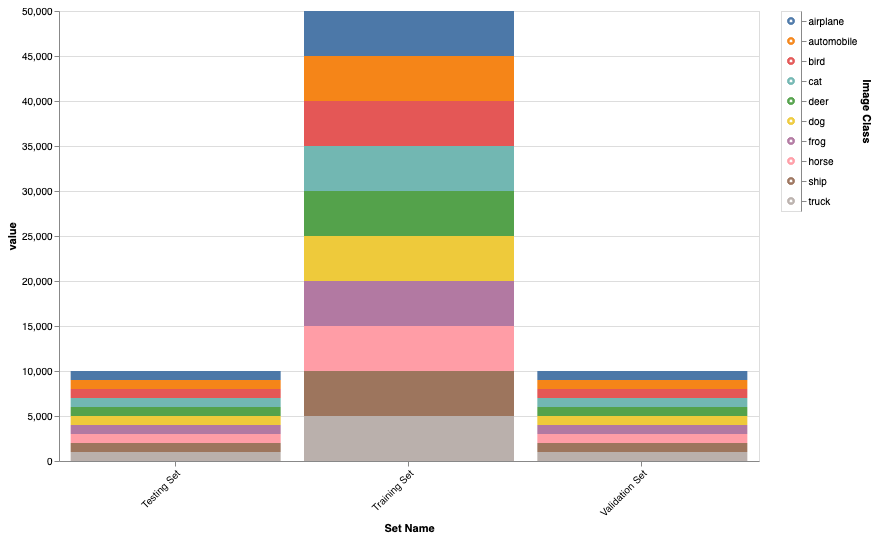

In [16]:
# Set a checkpoint
checkpoint(0)

# Get the counts of each of the image types and put them in a dataframe
set_value_counts = pd.DataFrame([
    np.unique(y_train, return_counts=True)[1],
    np.unique(y_val, return_counts=True)[1],
    np.unique(y_test, return_counts=True)[1]
], index=['Training Set', 'Validation Set', 'Testing Set'])

set_value_counts.columns = set_value_counts.columns.map(CLASS_NAMES)
set_value_counts.columns.name = 'Image Class'
set_value_counts.index.name = 'Set Name'

# Transform the dataframe into a format suitable for altair
source = set_value_counts.reset_index().melt('Set Name')

# Create a multi selection index with every class pre-initialised
selection = alt.selection_multi(
    fields=["Image Class"]
)
color = alt.condition(
    selection, alt.Color("Image Class:N", legend=None), alt.value("lightgray")
)

barchart = (
    alt.Chart(source)
    .mark_bar()
    .encode(x=alt.X("Set Name:N", axis=alt.Axis(labelAngle=-45)),
            y="value:Q", color=color, 
            tooltip=[alt.Tooltip("Image Class:N", title='Image Class'), 
                     alt.Tooltip("value:N", title='Number of Images')])
    .add_selection(selection)
    .properties(width=700,height=450)
)

legend = (
    alt.Chart(source)
    .mark_point()
    .encode(y=alt.Y("Image Class:N", axis=alt.Axis(orient="right")), color=color)
    .add_selection(selection)
)

barchart | legend

In [286]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

In [17]:
from ipywidgets import interact, widgets

checkpoint(0)

SAMPLE_SIZE = 101
img_idx_slider = widgets.IntSlider(value=0, min=0, max=SAMPLE_SIZE - 1, description="Image index", 
                                   layout=widgets.Layout(width='100%', height='50px'))

train_images_sample = {class_name: X_train[(y_train == class_idx).squeeze()][:SAMPLE_SIZE] 
                       for class_idx, class_name in CLASS_NAMES.items()}

@interact(i=img_idx_slider)
def visualize_prediction(i=0):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    for ax, class_name in zip(axes.flat, CLASS_NAMES.values()):
        ax.imshow(train_images_sample[class_name][i].squeeze())
        ax.set_title(f"Class / label: {class_name}")

interactive(children=(IntSlider(value=0, description='Image index', layout=Layout(height='50px', width='100%')…

## X.3 Data Preprocessing
Data preprocessing refers to the transformations and input pipelines we create and apply to our data before we feed it to the (machine learning) algorithm.

Often, data collected in a raw format is not feasible for the analysis - it is "messy". We gop through a process of "cleaning the data" to ensure that our algortithms can learn well. Thgis varies massively depending on the application we are building, but typical things we do in this stage are:

- Introducing missing values and treating them (replacing by average values)
- Noise filtering (e.g rolling averages to reduce the noise in time series application)
- Data discretization ("bucketing" the values into groups)
- Normalization and standardization
- Feature selection (either manually via experimentation or using other machine learning techniques to reduce the dataset to its key characteristics)

For Image data, standard techniques are:
- One
- Two etc...

For tabular data, standard techniques are:
- Missing value imputation (replacing missing values with sensible values)
    - If we have a table of features, and certain missing values (e.g a feature wasnt recorded for a particular person), we could replace that feature with the average feature overall or similar
    - For time series data, if a particular sensor failed to get a reading at a particular time, we could replace it with the average of the previous and subseqwuent recording ("linear interpolation")
    - etc...

We apply minimal processing to our data for this workshop. 

It turns out all neural networks perform better when their input values are smaller (e.g between 0 and 1), rather than large input values. One way we can do this for images is to divide each of the RGB numbers by 255. Meaning we go from a number between 0 and 255 to a number between 0 and 1. It reflects the same information but it just helps the neural networks learn better.

Click the button below to preprocess the data!

In [287]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

In [30]:
checkpoint(0)

# Preprocessing - normalise the images
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

DATA_PREPROCESSED = True

print('Images preprocessed successfully!')

Images preprocessed successfully!


**To add to** Define NN and CNN baselines and train NN baseline

In [288]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

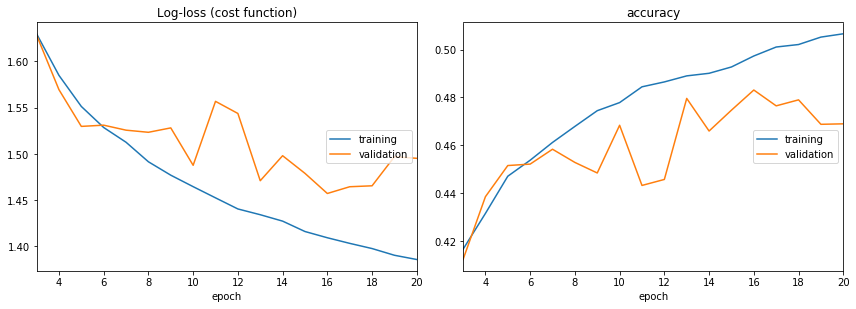

Log-loss (cost function):
training   (min:    1.386, max:    1.879, cur:    1.386)
validation (min:    1.457, max:    1.758, cur:    1.495)

accuracy:
training   (min:    0.316, max:    0.507, cur:    0.507)
validation (min:    0.375, max:    0.483, cur:    0.469)


In [31]:
checkpoint(1)

# Create the baseline model described in the text above (TODO)
baseline_NN_model = tf.keras.Sequential([
    # Flatten RGB image + NN
    tf.keras.layers.Flatten(input_shape=IMG_SHAPE, name='Flatten'),
    tf.keras.layers.Dense(128, activation='relu', name='Dense_1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense_2'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax', name='Predictions')
], name='Baseline_NN_Model')

# Print model summary - potentially remove - or print out image here
print(baseline_NN_model.summary())

# Compile the model - we will use the Adam optimiser and categorical crossentropy loss, logging the accuracy
# TODO: Tensorboard here and integrate callbacks into live tracking below? Potentially just a cleaner interface
baseline_NN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)  

# Fit the baseline model to the training data, validating against the validation data
baseline_NN_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size = BATCH_SIZE,
    validation_data=(X_val, y_val),
    callbacks=[PlotLossesCallback()],
    verbose=0
)

BASELINE_MODEL_BUILT = True

### Model Investigation

**To add to** Plot heatmap of confusion matrix of baseline NN model preds!

In [290]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

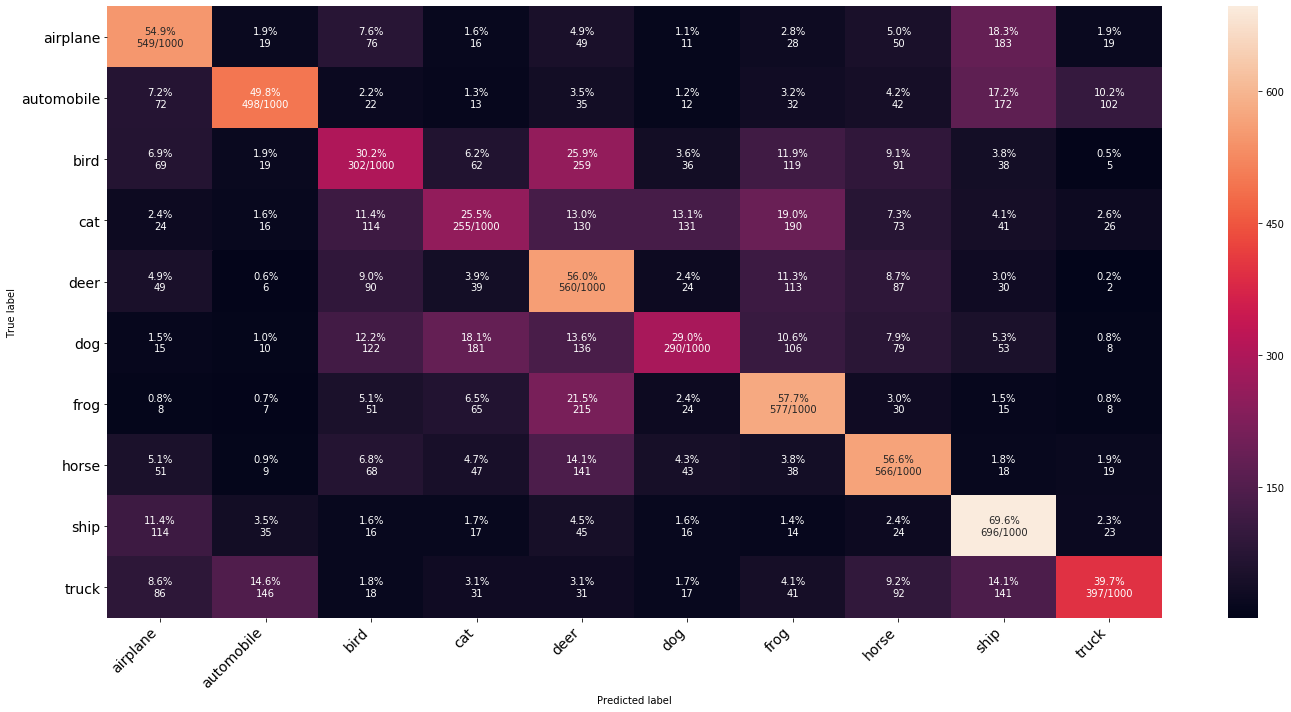

In [32]:
checkpoint(2)

def get_model_outputs(model, inputs):
    model_probs = model.predict(inputs)
    model_preds = model_probs.argmax(axis=1)
    return model_probs, model_preds

baseline_NN_model_probs, baseline_NN_model_preds = get_model_outputs(baseline_NN_model, X_test)
print_confusion_matrix(baseline_NN_model_preds, y_test, class_names=CLASS_NAMES.values())

NN_CONFUSION_MATRIX = True

**To add to** Visualise predictions of the model!

In [291]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

In [77]:
checkpoint(3)
## Nice image slider: https://sanjayasubedi.com.np/deeplearning/tensorflow-2-first-neural-network-for-fashion-mnist/
from ipywidgets import interact, widgets
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(X_test)-1, description="Image index",
                                   layout=widgets.Layout(width='100%', height='50px'))

@interact(i=img_idx_slider)
def visualize_prediction(i=0):
    img_probs, img_pred = baseline_NN_model_probs[i], baseline_NN_model_preds[i].squeeze()
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(X_test[i])
    ax1.set_title(f"Label: {CLASS_NAMES[y_test[i][0]]}")
    ax1.set_xlabel(f"Prediction: {CLASS_NAMES[img_pred]}")

    sns.barplot(x=list(CLASS_NAMES.values()), y=img_probs*100, ax=ax2, 
                palette=['grey' if (prob < max(img_probs)) else 'gold' for prob in img_probs])
    plt.xticks(rotation=90)

interactive(children=(IntSlider(value=0, description='Image index', layout=Layout(height='50px', width='100%')…

**To add into above** "Live training" a SOTA model but loading pretrained weights

In [292]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

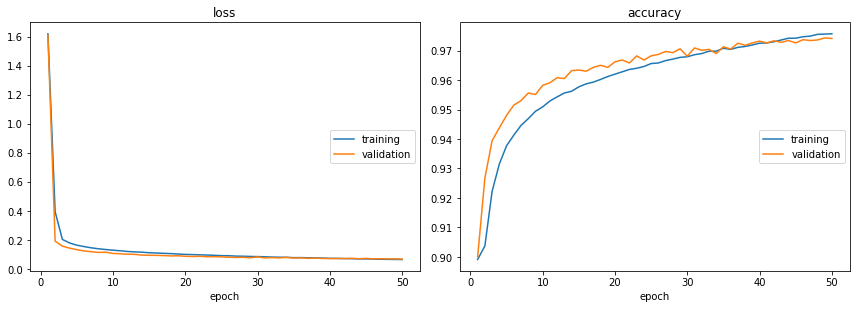

loss:
training   (min:    0.065, max:    1.620, cur:    0.065)
validation (min:    0.068, max:    1.612, cur:    0.068)

accuracy:
training   (min:    0.899, max:    0.976, cur:    0.976)
validation (min:    0.900, max:    0.974, cur:    0.974)


In [78]:
import time
liveplot = PlotLosses(skip_first=0)
with open('VGG_results.txt', 'r') as vgg_results:
    for line_count, line in enumerate(vgg_results):
        # If we have an even line then it will say Epoch x/50 - extract the epoch number
        if line_count % 2 == 0:
            epoch_num = line_count // 2 + 1
        else:
            loss, acc, val_loss, val_acc = (float(line.split(": ")[metric_num][:6]) for metric_num in range(1,5))
            liveplot.update({
                'loss': loss,
                'val_loss': val_loss,
                'accuracy': acc,
                'val_accuracy': val_acc
            })
            liveplot.draw()
            time.sleep(1.)

In [59]:
vgg_model = tf.keras.Sequential([ 
    # Define the model input explicitly here
    tf.keras.layers.Input(IMG_SHAPE),
    
    # VGG-16 normally expects 224x224 images, if we wanted we could upsample the images, but they are already blurry!
    #tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224,224)), input_shape = IMG_SHAPE),
    
    # Block 1
    tf.keras.layers.Convolution2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", 
                                  name='block1_conv1'),
    tf.keras.layers.Convolution2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", 
                                  name='block1_conv2'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block1_pool'),

    # Block 2
    tf.keras.layers.Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", 
                                  name='block2_conv1'),
    tf.keras.layers.Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", 
                                  name='block2_conv2'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block2_pool'),

    # Block 3
    tf.keras.layers.Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", 
                                  name='block3_conv1'),
    tf.keras.layers.Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", 
                                  name='block3_conv2'),
    tf.keras.layers.Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", 
                                  name='block3_conv3'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block3_pool'),
 
    # Normally, VGG-16 has 5 Conv blocks, but we shorten this to 3 given the input image size and to ensure
    # inference is somewhat quicker. It also turns out this gets quite high accuracy whilst still being lightweight
    # - this is a process of trial and error!
#     # Block 4
#     tf.keras.layers.Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", 
#                                   name='block4_conv1'),
#     tf.keras.layers.Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", 
#                                   name='block4_conv2'),
#     tf.keras.layers.Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", 
#                                   name='block4_conv3'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block3_pool'),
    
#     # Block 5
#     tf.keras.layers.Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", 
#                                   name='block5_conv1'),
#     tf.keras.layers.Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", 
#                                   name='block5_conv2'),
#     tf.keras.layers.Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", 
#                                   name='block5_conv3'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block4_pool'),

    # Add classification layers on top of it, projecting the pretrained base model knowledge directly onto the classes
    # This is our initial attempt (one dense layer for a linear projection) but this is up to experimentation
    # The number of hidden units is a hyperparameter here!
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(256, activation='relu', name='dense_projection'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax', name='predictions')
], name='VGG-16 Adapted Model')

In [121]:
print(vgg_model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

In [122]:
vgg_model.load_weights('cifar10-vgg16-pretrained.h5')

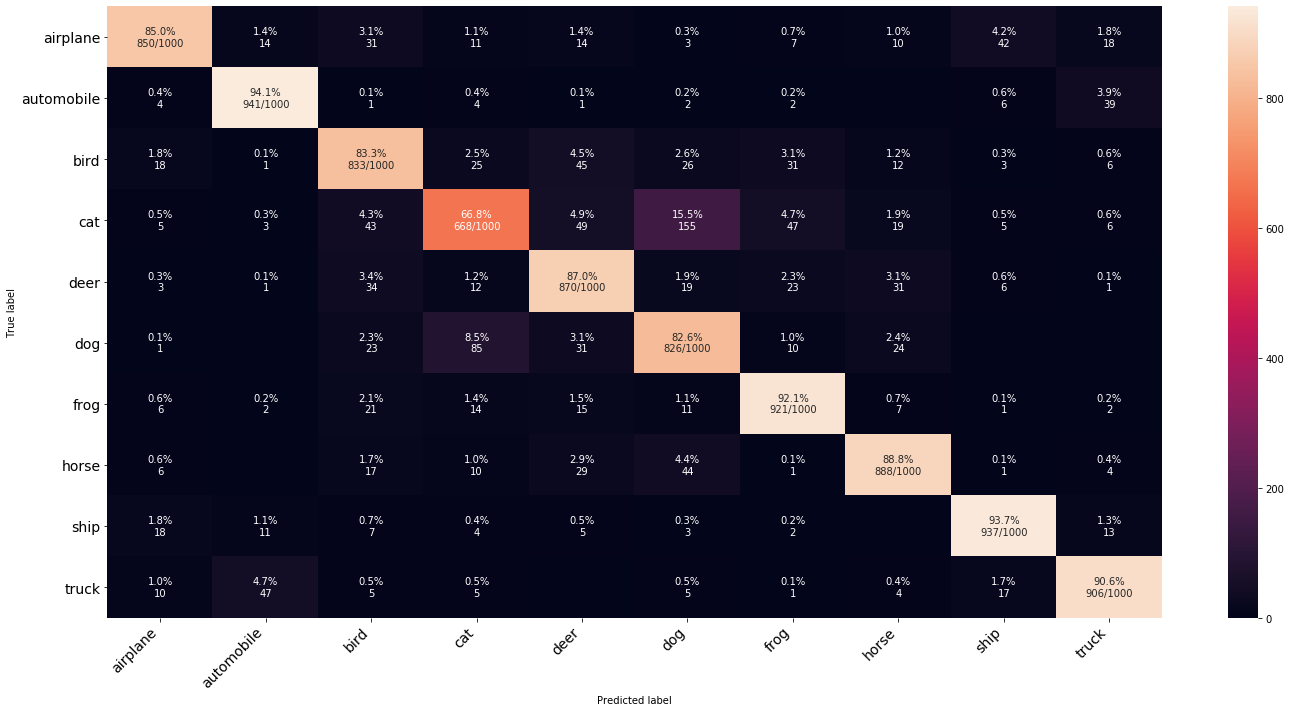

In [36]:
def get_model_outputs(model, inputs):
    model_probs = model.predict(inputs)
    model_preds = model_probs.argmax(axis=1)
    return model_probs, model_preds

vgg_model_probs, vgg_model_preds = get_model_outputs(vgg_model, X_test)
print_confusion_matrix(vgg_model_preds, y_test, class_names=CLASS_NAMES.values())

In [48]:
## Nice image slider: https://sanjayasubedi.com.np/deeplearning/tensorflow-2-first-neural-network-for-fashion-mnist/
from ipywidgets import interact, widgets
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(X_test)-1, description="Image index",
                                   layout=widgets.Layout(width='100%', height='50px'))

@interact(i=img_idx_slider)
def visualize_prediction(i=0):
    baseline_img_probs, baseline_img_pred = baseline_NN_model_probs[i], baseline_NN_model_preds[i].squeeze()
    vgg_img_probs, vgg_img_pred = vgg_model_probs[i], vgg_model_preds[i].squeeze()
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.imshow(X_test[i])
    ax1.set_title(f"Label: {CLASS_NAMES[y_test[i][0]]}")
    ax1.set_xlabel(f"Baseline Prediction: {CLASS_NAMES[baseline_img_pred]} \n VGG Prediction: {CLASS_NAMES[vgg_img_pred]}")

    sns.barplot(x=list(CLASS_NAMES.values()), y=baseline_img_probs*100, ax=ax2, 
                palette=['grey' if (prob < max(baseline_img_probs)) else 'gold' for prob in baseline_img_probs])
    ax2.set_title("Baseline Neural Network Model Prediction")
    
    sns.barplot(x=list(CLASS_NAMES.values()), y=vgg_img_probs*100, ax=ax3, 
                palette=['grey' if (prob < max(vgg_img_probs)) else 'gold' for prob in vgg_img_probs])
    ax3.set_title("VGG-16 Model Prediction")
    
    for axis in [ax2, ax3]:
        axis.set_ylim([0,100])
        axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

interactive(children=(IntSlider(value=0, description='Image index', layout=Layout(height='50px', width='100%')…

## Image 725 is a good example. It still labels a bird wrong. Why? It's because its next to water!

In [123]:
from sklearn.manifold import TSNE

In [156]:
feature_extractor = tf.keras.Model(inputs=vgg_model.input,
                                   outputs=vgg_model.get_layer('dense_projection').output)
features = feature_extractor.predict(X_test)

In [99]:
from sklearn.manifold import TSNE
tsne = TSNE().fit_transform(features)
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

In [102]:
tsne = (tsne - np.min(tsne)) / (np.max(tsne) - np.min(tsne))

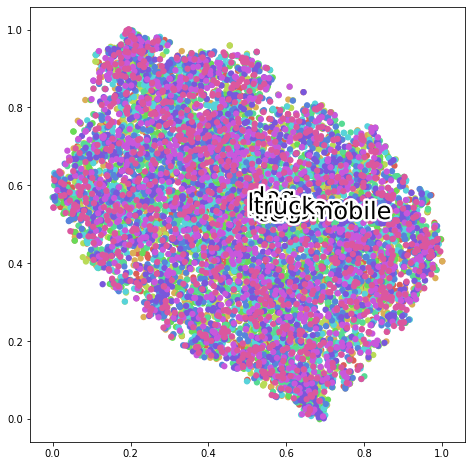

In [103]:
import matplotlib.patheffects as pe
palette = np.array(sns.color_palette("hls", 10))  #Choosing color palette 

colours = np.hstack([y_test[y_test==i] for i in range(10)])
# Create a scatter plot.
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(tx, ty, lw=0, s=40, c=palette[colours.astype(np.int)])
# Add the labels for each digit.
txts = []
for class_number, class_name in CLASS_NAMES.items():
    # Position of each label.
    xtext, ytext = np.median(tsne[colours == class_number, :], axis=0)
    txt = ax.text(xtext, ytext, str(class_name), fontsize=24)
    txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
    txts.append(txt)

In [112]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
width = 4000
height = 3000
max_dim = 100
full_image = Image.new('RGB', (width, height))
for idx, x in enumerate(X_test):
    tile = Image.fromarray(np.uint8(x * 255))
    rs = max(1, tile.width / max_dim, tile.height / max_dim)
    tile = tile.resize((int(tile.width / rs),
                        int(tile.height / rs)),
                       Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]),
                            int((height-max_dim) * ty[idx])))
full_image.show()

In [125]:
# Maybe import tsne library here instead of SKLEARN!!
tsne_points = TSNE(perplexity=30, random_state=0).fit_transform(intermediate_output) 

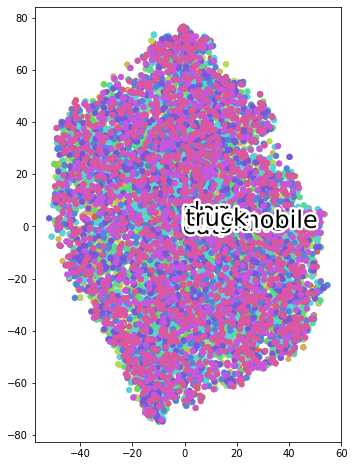

In [126]:
import matplotlib.patheffects as pe
palette = np.array(sns.color_palette("hls", 10))  #Choosing color palette 

colours = np.hstack([y_test[y_test==i] for i in range(10)])
# Create a scatter plot.
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(tsne_points[:,0], tsne_points[:,1], lw=0, s=40, c=palette[colours.astype(np.int)])
# Add the labels for each digit.
txts = []
for class_number, class_name in CLASS_NAMES.items():
    # Position of each label.
    xtext, ytext = np.median(tsne_points[colours == class_number, :], axis=0)
    txt = ax.text(xtext, ytext, str(class_name), fontsize=24)
    txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
    txts.append(txt)

In [192]:
import shap

In [193]:
explainer = shap.GradientExplainer(vgg_model, [X_train, X_train])

# we explain the model's predictions on the first three samples of the test set
shap_values = explainer.shap_values(X_test[:3])

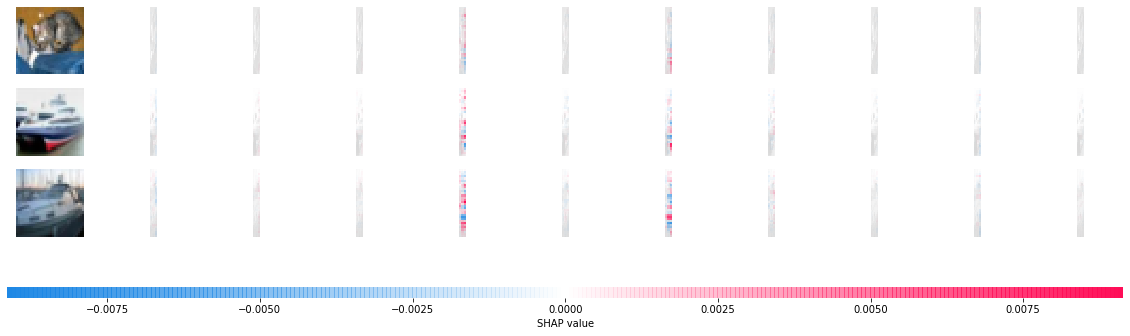

In [194]:
# here we plot the explanations for all classes for the first input (this is the feed forward input)
shap.image_plot([shap_values[i][0] for i in range(10)], X_test[:3])

In [350]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tf_explain.core.grad_cam import GradCAM
SAMPLE_SIZE = 101
img_idx_slider = widgets.IntSlider(value=0, min=0, max=SAMPLE_SIZE - 1, description="Image index", 
                                   layout=widgets.Layout(width='100%', height='50px'))

test_images_sample = {class_name: X_test[(y_test == class_idx).squeeze()][:SAMPLE_SIZE] 
                       for class_idx, class_name in CLASS_NAMES.items()}
test_images_pred_sample = {class_name: vgg_model.predict(class_sample) 
                           for class_name, class_sample in test_images_sample.items()}
explainer = GradCAM()


@interact(i=img_idx_slider)
def visualize_prediction(i=0):
    fig = plt.figure(figsize=(20, 8))
    outer = gridspec.GridSpec(2, 5, wspace=0.2, hspace=0.2)
    for class_idx, class_name in CLASS_NAMES.items():
        inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                                                 subplot_spec=outer[class_idx], 
                                                 wspace=0.1, hspace=0.1)
        test_image = test_images_sample[class_name][i].squeeze()
        data = ([test_image], None)
        # Compute GradCAM on VGG16
        grid = explainer.explain(
            data, vgg_model, class_index=0, layer_name="block3_conv3"
        )
        for subplot_num, image in enumerate([test_image, grid]):
            ax = plt.Subplot(fig, inner[subplot_num])
            ax.imshow(image)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
            if subplot_num == 0:
                predicted_class = CLASS_NAMES[test_images_pred_sample[class_name][i].argmax()]
                ax.set_title(f'Actual Class: {class_name} \n Predicted Class: {predicted_class}')

interactive(children=(IntSlider(value=0, description='Image index', layout=Layout(height='50px', width='100%')…

## Future Work
### The CIFAR-100 dataset
This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
Here is the list of classes in the CIFAR-100:


| Superclass | Classes |
|:----------|:--------:|
| aquatic mammals | beaver, dolphin, otter, seal, whale |
| fish | aquarium fish, flatfish, ray, shark, trout |
| flowers | orchids, poppies, roses, sunflowers, tulips |
| food containers | bottles, bowls, cans, cups, plates |
| fruit and vegetables | apples, mushrooms, oranges, pears, sweet peppers |
| household electrical devices | clock, computer keyboard, lamp, telephone, television |
| household furniture | bed, chair, couch, table, wardrobe |
| insects | bee, beetle, butterfly, caterpillar, cockroach |
| large carnivores | bear, leopard, lion, tiger, wolf |
| large man-made outdoor things | bridge, castle, house, road, skyscraper |
| large natural outdoor scenes | cloud, forest, mountain, plain, sea |
| large omnivores and herbivores | camel, cattle, chimpanzee, elephant, kangaroo |
| medium-sized mammals | fox, porcupine, possum, raccoon, skunk |
| non-insect invertebrates | crab, lobster, snail, spider, worm |
| people | baby, boy, girl, man, woman |
| reptiles | crocodile, dinosaur, lizard, snake, turtle |
| small mammals | hamster, mouse, rabbit, shrew, squirrel |
| trees | maple, oak, palm, pine, willow |
| vehicles 1 | bicycle, bus, motorcycle, pickup truck, train |
| vehicles 2 | lawn-mower, rocket, streetcar, tank, tractor |
